In [4]:
# 05. Elastic Net (Otimização de Alpha e Lambda)
# Code (Setup)	
library(caret)


library(glmnet)


library(MASS)


data(Boston)


set.seed(42)

Carregando pacotes exigidos: lattice


Anexando pacote: 'caret'


O seguinte objeto é mascarado por 'package:purrr':

    lift


Carregando pacotes exigidos: Matrix


Anexando pacote: 'Matrix'


Os seguintes objetos são mascarados por 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-10


Anexando pacote: 'MASS'


O seguinte objeto é mascarado por 'package:dplyr':

    select




In [6]:
# Partição para treino e teste

# caret prefere o data.frame


train_indices <- createDataPartition(Boston$medv, p = 0.7, list = FALSE)


Boston_treino <- Boston[train_indices, ]


Boston_teste <- Boston[-train_indices, ]

In [8]:
# 1. Definir a grade de hiperparâmetros para busca
# alpha: 0 (Ridge) a 1 (Lasso)
# lambda: força da penalidade (escala logarítmica)


grid_otimizacao <- expand.grid(


alpha = seq(0, 1, length = 10),


lambda = 10^seq(-2, 1, length = 10)


)

In [9]:
# 2. Treinar o modelo Elastic Net usando validação cruzada


controle_cv <- trainControl(method = "cv", number = 5)


modelo_en <- train(


medv ~ ., data = Boston_treino,


method = "glmnet",


tuneGrid = grid_otimizacao,


trControl = controle_cv,


preProcess = c("center", "scale") # Normalização de features


)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


       alpha    lambda
15 0.1111111 0.2154435
Melhor Alpha: 0.1111111 
Melhor Lambda: 0.2154435 


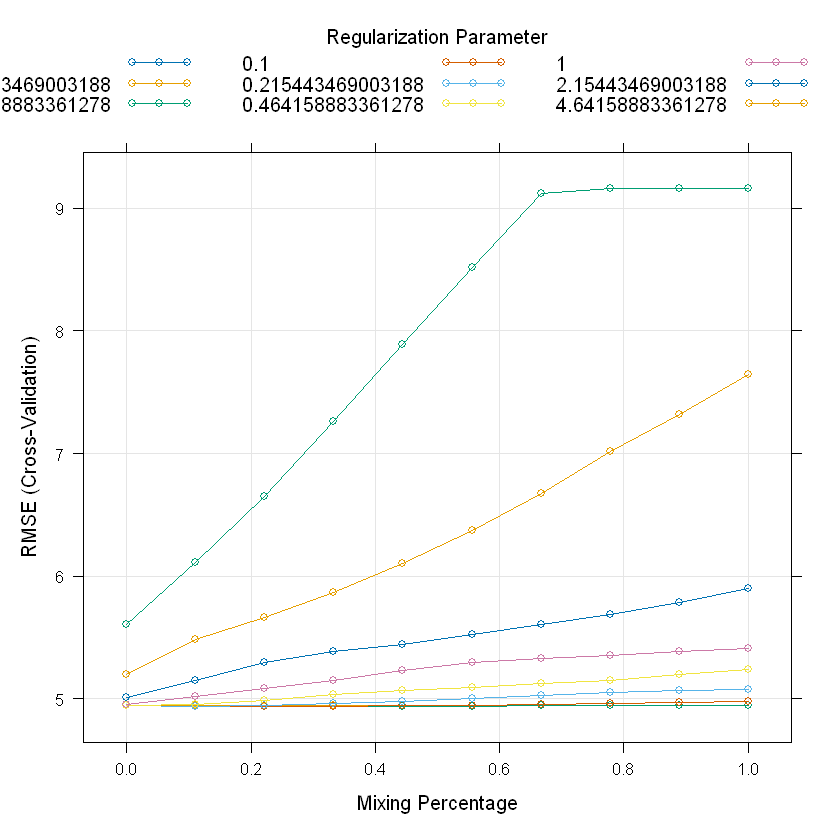

In [10]:
# 3. Visualizar e obter os melhores hiperparâmetros


print(modelo_en$bestTune)


cat("Melhor Alpha:", modelo_en$bestTune$alpha, "\n")


cat("Melhor Lambda:", modelo_en$bestTune$lambda, "\n")


# Plotar o desempenho na grade de tuning


plot(modelo_en)

In [ ]:
# 4. Previsão no conjunto de teste


previsoes_en <- predict(modelo_en, Boston_teste)


rmse_en <- sqrt(mean((previsoes_en - Boston_teste$medv)^2))


cat("RMSE (Elastic Net Final):", round(rmse_en, 3), "\n")